<a href="https://colab.research.google.com/github/jbarcenilla21/APRENDIZAJE_AUTOMATICO_23_24/blob/main/MDD_Capstone_A07(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAPSTONE MINERÍA DE DATOS

## Índice

1. **Introducción**
   - Breve descripción del proyecto y los objetivos.
   - Resumen del conjunto de datos utilizado que incluye métricas de jugadores de la temporada 2021-2022 de la Premier League.

2. **Preparación de Datos**

   2.1. Carga de Datos

   2.2. Exploración Inicial de Datos
   
   2.3. Limpieza de Datos

3. **Análisis Exploratorio de Datos (EDA)**

   3.1. Estadísticas Descriptivas

   3.2. Distribución de Variables

   3.3. Análisis de Correlaciones

4. **Modelado**

   4.1. Regresión Lineal y PCA
      - 4.1.1. Reducción de dimensionalidad (PCA)
      - 4.1.2. Regresión Múltiple

   4.2. K-means Clustering

5. **Regresión Logística Dicotómica**

   5.1. Generación de la Variable Objetivo

   5.2. Preparación de los Datos (normalización)

   5.3. División en Train y Test

   5.4. Generación del Modelo

   5.5. Análisis de los Resultados

6. **Cálculo de la Probabilidad de los Grupos**

7. **Conclusión**

8. **Trabajo a Futuro**

## 1 Introducción

Hemos recopilado datos sobre las actuaciones de los jugadores de la Premier League para la temporada del 2021-2022 desde el sitio web fbref.com. Este conjunto de datos incluye 83 métricas diferentes sobre los jugadores. La página web proporciona datos sobre muchas más métricas si se desea consultarlas. La idea es utilizar estas métricas para agrupar a los jugadores según su estilo de juego. Una manera genérica de hacerlo sería simplemente diferenciar a los jugadores según sus posiciones, sin embargo, esto no resulta interesante. Se sabe, además que las posiciones en el fútbol moderno a menudo se superponen. Muchos laterales participan extensamente en los ataques, sacrificando a menudo sus responsabilidades defensivas, mientras que los mediocampistas centrales los cubren en la defensa. Queremos ver si el algoritmo de agrupamiento, basado en estas 83 métricas, puede capturar esta nueva tendencia.


 El conjunto de datos incluye 83 métricas diferentes de los jugadores de la temporada 2021 - 2022 de la Premier League

## 2 Preparación de los datos

### 2.1  Carga de datos

In [ ]:
from google.colab import files
import pandas as pd

# Subir el archivo
uploaded = files.upload()

# Leer el archivo CSV
file_name = next(iter(uploaded))  # obtiene el nombre del archivo subido
data = pd.read_csv(file_name)

# Mostrar las primeras filas del DataFrame
print(data.head())


Saving 2021-22_EPL_PlayerStats.csv to 2021-22_EPL_PlayerStats.csv
   Unnamed: 0  Rk           Player Pos  MP  Starts   Min   90s  Gls  Ast  ...  \
0           0   1       Max Aarons  DF  18      18  1620  18.0    0    1  ...   
1           1   2        Che Adams  FW  13      11   868   9.6    3    1  ...   
2           2   3  Rayan Aït Nouri  DF   9       8   718   8.0    0    1  ...   
3           3   4  Kristoffer Ajer  DF   7       6   565   6.3    0    0  ...   
4           4   5       Nathan Aké  DF   8       6   581   6.5    1    0  ...   

   AttPenTouch  SuccDrib  AtmpDrib  Nutnegs  Carries  TotDistCarry  \
0           16        25        53        4      647          3836   
1           44         4        12        0      202           796   
2           18        17        31        2      343          1681   
3            9         4         6        0      126           774   
4            3         0         2        0      402          2084   

   PrgDistCarry  CarryAtt3

### 2.2 Exploración inicial de los datos

Imprimimos todas las variables

In [ ]:
# Imprimir todos los nombres de las columnas
print(data.columns)


Index(['Unnamed: 0', 'Rk', 'Player', 'Pos', 'MP', 'Starts', 'Min', '90s',
       'Gls', 'Ast', 'NPG', 'PG', 'PA_x', 'YC', 'RC', 'Gls/90', 'Ast/90',
       'G+A/90', 'xG', 'npxG', 'xA', 'npxG+xA', 'xG/90', 'xA/90', 'xG+xA/90',
       'npxG/90', 'npxG+xA/90', 'SCA', 'SCA/90', 'SCPass', 'SCDeadPass',
       'SCDrib', 'GCA', 'GCA/90', 'GCPass', 'GCDeadPass', 'GCDrib', 'PossTkl',
       'TklDef3rd', 'TklMid3rd', 'TklAtt3rd', 'DriblTkl%', 'DriblledPast',
       '%SuccPress', 'PressDef3rd', 'PressMid3rd', 'PressAtt3rd', 'Blocks',
       'ShotBlocks', 'Interception', 'Clearances', 'GoalErrors', 'TCP', 'PA_y',
       'TotDist', 'PrgDist', 'TSPC', 'SPA', 'TMPC', 'MPA', 'TLPC', 'LPA',
       'KeyP', 'Pass18', 'Cross18', 'ProgPass', 'Live', 'Dead', 'FKPass',
       'PressPass', 'Cross', 'LeftP', 'RightP', 'Touches', 'Def3rdTouch',
       'Mid3rdTouch', 'Att3rdTouch', 'AttPenTouch', 'SuccDrib', 'AtmpDrib',
       'Nutnegs', 'Carries', 'TotDistCarry', 'PrgDistCarry', 'CarryAtt3rd',
       'Carry18Yd



#### Descripción de Variables del Dataset

En este apartado, detallamos las variables incluidas en nuestro dataset, agrupándolas por categorías funcionales para facilitar la comprensión del análisis:

##### Variables Generales
- **Unnamed: 0**: Índice automático generado al leer el archivo CSV, generalmente eliminable.
- **Rk**: Clasificación o rango del jugador.
- **Player**: Nombre completo del jugador.
- **Pos**: Posición del jugador en el campo.
- **MP**: Número de partidos jugados.

##### Tiempo de Juego y Participación
- **Starts**: Número de partidos en los que el jugador fue titular.
- **Min**: Minutos jugados en total.
- **90s**: Número de partidos completos jugados, ajustados a 90 minutos.

##### Rendimiento Ofensivo
- **Gls**: Total de goles marcados.
- **Ast**: Total de asistencias realizadas.
- **NPG**: Goles marcados que no fueron de penal.
- **PG**: Goles de penalti.
- **PA_x**: Penales intentados.
- **Gls/90**: Promedio de goles por 90 minutos jugados.
- **Ast/90**: Promedio de asistencias por 90 minutos jugados.
- **G+A/90**: Suma de goles y asistencias por 90 minutos jugados.

##### Estadísticas Avanzadas de Juego
- **xG**: Goles esperados según la calidad de las jugadas.
- **npxG**: Goles no penales esperados.
- **xA**: Asistencias esperadas.
- **npxG+xA**: Suma de goles no penales esperados y asistencias esperadas.
- **xG/90, xA/90, xG+xA/90**: Estadísticas de goles y asistencias esperados por 90 minutos.
- **npxG/90, npxG+xA/90**: Estadísticas de goles no penales esperados por 90 minutos.

##### Creación de Oportunidades
- **SCA, SCA/90**: Acciones que crean oportunidades de tiro.
- **SCPass, SCDeadPass, SCDrib**: Tipos de pases y regates que crean tiros.
- **GCA, GCA/90**: Acciones que resultan en gol.
- **GCPass, GCDeadPass, GCDrib**: Tipos de pases y regates que resultan en gol.

##### Acciones Defensivas
- **PossTkl, TklDef3rd, TklMid3rd, TklAtt3rd**: Entradas en diferentes áreas del campo.
- **DriblTkl%, DriblledPast**: Efectividad y fallos en los regates.
- **%SuccPress, PressDef3rd, PressMid3rd, PressAtt3rd**: Efectividad de las presiones en diferentes zonas.
- **Blocks, ShotBlocks, Interception, Clearances, GoalErrors**: Estadísticas defensivas relacionadas con bloqueos, intercepciones y despejes.

##### Distribución del Balón
- **TCP, PA_y, TotDist, PrgDist**: Estadísticas de pases.
- **TSPC, SPA, TMPC, MPA, TLPC, LPA**: Diferentes tipos de pases completados e intentados.
- **KeyP, Pass18, Cross18, ProgPass**: Pases clave y en zonas críticas.
- **Live, Dead, FKPass, PressPass, Cross**: Tipos de pases en diferentes contextos.

##### Toques y Conducciones
- **LeftP, RightP, Touches, Def3rdTouch, Mid3rdTouch, Att3rdTouch, AttPenTouch**: Distribución de toques y pases según la zona y la pierna utilizada.
- **SuccDrib, AtmpDrib, Nutnegs, Carries**: Estadísticas de regates y conducciones.
- **TotDistCarry, PrgDistCarry, CarryAtt3rd, Carry18Yd, CarryDIsp**: Conducciones y su efectividad en diferentes áreas del campo.





In [ ]:
# Verificar los tipos de datos de cada columna
print("\nTipos de datos de cada columna:")
print(data.dtypes)

# Verificar si hay valores faltantes
print("\nValores faltantes por columna:")
print(data.isnull().sum())


Tipos de datos de cada columna:
Unnamed: 0       int64
Rk               int64
Player          object
Pos             object
MP               int64
                 ...  
TotDistCarry     int64
PrgDistCarry     int64
CarryAtt3rd      int64
Carry18Yd        int64
CarryDIsp        int64
Length: 87, dtype: object

Valores faltantes por columna:
Unnamed: 0      0
Rk              0
Player          0
Pos             0
MP              0
               ..
TotDistCarry    0
PrgDistCarry    0
CarryAtt3rd     0
Carry18Yd       0
CarryDIsp       0
Length: 87, dtype: int64


### 2.3 Limpieza de los datos.

Vamos a eliminar la columna "Unnamed: 0:" ya que no aporta ninguna información al dataset

In [ ]:
import pandas as pd


# Eliminar la primera columna (independientemente de su nombre)
data = data.iloc[:, 1:]


# Mostrar las primeras filas del DataFrame limpio
print("\nPrimeras filas del DataFrame limpio:")
print(data.head())



Primeras filas del DataFrame limpio:
   Rk           Player Pos  MP  Starts   Min   90s  Gls  Ast  NPG  ...  \
0   1       Max Aarons  DF  18      18  1620  18.0    0    1    0  ...   
1   2        Che Adams  FW  13      11   868   9.6    3    1    3  ...   
2   3  Rayan Aït Nouri  DF   9       8   718   8.0    0    1    0  ...   
3   4  Kristoffer Ajer  DF   7       6   565   6.3    0    0    0  ...   
4   5       Nathan Aké  DF   8       6   581   6.5    1    0    1  ...   

   AttPenTouch  SuccDrib  AtmpDrib  Nutnegs  Carries  TotDistCarry  \
0           16        25        53        4      647          3836   
1           44         4        12        0      202           796   
2           18        17        31        2      343          1681   
3            9         4         6        0      126           774   
4            3         0         2        0      402          2084   

   PrgDistCarry  CarryAtt3rd  Carry18Yd  CarryDIsp  
0          2370           34          7    

Vamos a ver cuantos partidos ha jugado cada jugador

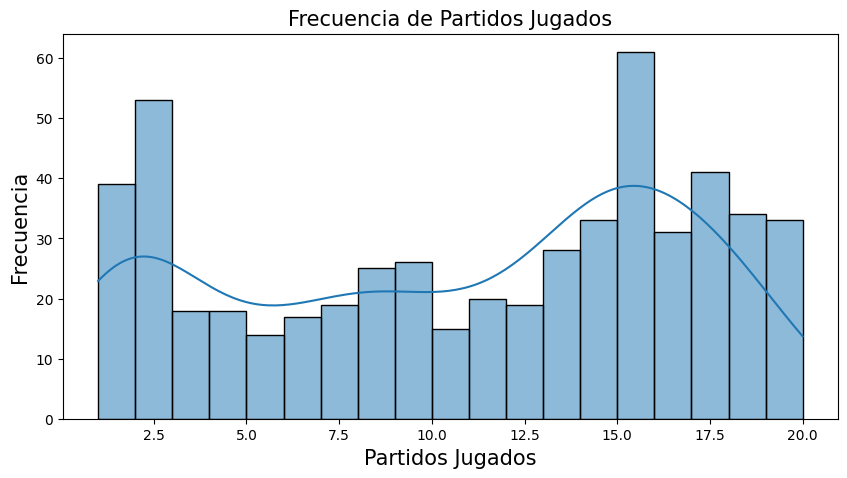

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
# Graficar la frecuencia de partidos jugados (MP)
plt.figure(figsize=(10,5))
sns.histplot(data, x='MP', kde=True, binwidth=1)
plt.title('Frecuencia de Partidos Jugados', size=15)
plt.xlabel('Partidos Jugados', size=15)
plt.ylabel('Frecuencia', size=15)
plt.show()

Hemos observado que el jugador con más partidos ha participado en 20 encuentros, lo que nos indica que estas estadísticas corresponden hasta la jornada vigésima de la temporada 2021-2022 de la Premier League.

Para simplificar nuestro análisis y centrarnos en jugadores con suficiente tiempo de juego, vamos a proceder a eliminar del dataset a aquellos jugadores que hayan participado en menos de 5 partidos. Además, para mantener la consistencia numérica en nuestras variables, cambiaremos los valores `NULL` por `0`. Este ajuste nos permitirá realizar cálculos estadísticos sin inconvenientes de interpretación o errores técnicos.


In [ ]:
# Mostrar las primeras 5 filas que contienen valores faltantes
data[data.isna().any(axis=1)].head(5)

,Rk,Player,Pos,MP,Starts,Min,90s,Gls,Ast,NPG,...,AttPenTouch,SuccDrib,AtmpDrib,Nutnegs,Carries,TotDistCarry,PrgDistCarry,CarryAtt3rd,Carry18Yd,CarryDIsp
17,18,Cameron Archer,"MF,FW",3,0,27,0.3,0,0,0,...,3,1,2,0,7,15,0,0,0,1
20,21,Kepa Arrizabalaga,GK,1,1,90,1.0,0,0,0,...,0,0,0,0,20,65,29,0,0,0
21,22,Harrison Ashby,DF,1,0,7,0.1,0,0,0,...,0,0,0,0,4,21,5,0,0,0
26,27,Daniel Bachmann,GK,10,10,900,10.0,0,0,0,...,0,1,1,0,153,840,540,0,0,0
29,30,Folarin Balogun,FW,2,1,70,0.8,0,0,0,...,6,0,2,0,16,50,16,0,1,2


Tras revisar nuestro dataset, hemos confirmado que está limpio y listo para un análisis más detallado. Como parte de nuestra metodología, eliminaremos a los jugadores que hayan participado en menos de 5 partidos, dado que su contribución no es significativa para el alcance de nuestro estudio.

Además, procederemos a eliminar la columna "Posición" del dataset. En su lugar, crearemos dos nuevas columnas: "Primary_Pos" y "Secondary_Pos". Esta modificación nos permitirá reflejar con mayor precisión la versatilidad de ciertos jugadores, como por ejemplo Kyle Walker, quien puede desempeñarse tanto en la posición de defensa central como en la de lateral derecho. Este ajuste es crucial para analizar las dinámicas modernas del fútbol, donde la flexibilidad posicional es cada vez más relevante, como ya se ha comentado en la introducción.



In [ ]:
# Filtrar jugadores que han jugado más de 5 partidos
data = data[data['MP'] > 5]

# Separar posición primaria y secundaria
data['Primary_pos'] = data['Pos'].str.split(',').str[0]
data['Secondary_pos'] = data['Pos'].str.split(',').str[1]

# Rellenar valores faltantes en 'Secondary_pos' con 'NA'
data['Secondary_pos'] = data['Secondary_pos'].fillna('NA')

# Eliminar la columna original 'Pos'
data.drop(columns=['Pos'], inplace=True)

# Rellenar valores faltantes en todo el DataFrame con 0
data = data.fillna(0)

# Mostrar las primeras filas del DataFrame limpio
print(data.head())

   Rk           Player  MP  Starts   Min   90s  Gls  Ast  NPG  PG  ...  \
0   1       Max Aarons  18      18  1620  18.0    0    1    0   0  ...   
1   2        Che Adams  13      11   868   9.6    3    1    3   0  ...   
2   3  Rayan Aït Nouri   9       8   718   8.0    0    1    0   0  ...   
3   4  Kristoffer Ajer   7       6   565   6.3    0    0    0   0  ...   
4   5       Nathan Aké   8       6   581   6.5    1    0    1   0  ...   

   AtmpDrib  Nutnegs  Carries  TotDistCarry  PrgDistCarry  CarryAtt3rd  \
0        53        4      647          3836          2370           34   
1        12        0      202           796           369            6   
2        31        2      343          1681          1100            8   
3         6        0      126           774           452            5   
4         2        0      402          2084          1406            9   

   Carry18Yd  CarryDIsp  Primary_pos  Secondary_pos  
0          7         20           DF             NA  
1 

<ipython-input-37-02600cea904e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Primary_pos'] = data['Pos'].str.split(',').str[0]
<ipython-input-37-02600cea904e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Secondary_pos'] = data['Pos'].str.split(',').str[1]
<ipython-input-37-02600cea904e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

## 3 Análisis exploratorio de los datos (EDA)

Primero identificaremos qué jugadores en nuestro dataset desempeñan más de una posición, para ello, procederemos de la siguiente manera:



In [ ]:
# Filtrar jugadores con más de una posición
multi_position_players = data[data['Secondary_pos'] != 'NA']

# Mostrar todos los jugadores con más de una posición
print(multi_position_players)

      Rk             Player  MP  Starts   Min   90s  Gls  Ast  NPG  PG  ...  \
5      6    Marc Albrighton   8       4   430   4.8    1    0    1   0  ...   
10    11          Dele Alli  10       8   657   7.3    1    0    0   1  ...   
18    19     Adam Armstrong  16      14  1171  13.0    2    2    2   0  ...   
27    28        Leon Bailey   9       4   424   4.7    1    2    1   0  ...   
34    35      Harvey Barnes  14      13  1025  11.4    2    2    2   0  ...   
..   ...                ...  ..     ...   ...   ...  ...  ...  ...  ..  ...   
514  453      Nikola Vlašić   9       2   221   2.5    1    0    1   0  ...   
524  463      Danny Welbeck   6       3   295   3.3    2    0    2   0  ...   
537  476  Andriy Yarmolenko   9       0    70   0.8    0    0    0   0  ...   
538  477       Ashley Young  12       7   733   8.1    0    2    0   0  ...   
541  480       Hakim Ziyech  10       6   550   6.1    1    2    1   0  ...   

     AtmpDrib  Nutnegs  Carries  TotDistCarry  PrgD

In [ ]:
data['Performance_Index'] = data['Gls'] + data['Ast'] + 0.5 * (data['SCA'] + data['GCA'])
top_players = data.sort_values(by='Performance_Index', ascending=False).head(10)
print(top_players[['Player', 'Performance_Index']])


                     Player  Performance_Index
439           Mohamed Salah               75.0
7    Trent Alexander-Arnold               62.0
16          Michail Antonio               52.0
46             Jarrod Bowen               51.0
460          Bernardo Silva               51.0
147         Conor Gallagher               49.0
131         Bruno Fernandes               47.5
438             Bukayo Saka               47.0
183           Son Heung-min               43.0
362             Mason Mount               43.0


Mohamed Salah lidera la lista con un índice de rendimiento de 75.0, lo cual es considerablemente alto comparado con otros jugadores. Esto sugiere que Salah no solo ha marcado muchos goles y dado asistencias, sino que también ha estado involucrado en una gran cantidad de acciones que crearon oportunidades de gol. Esto refleja su rol crítico en el ataque de su equipo.

Trent Alexander-Arnold sigue con un índice de 62.0. Siendo un defensor, tener un índice tan alto indica su fuerte contribución ofensiva, probablemente a través de asistencias y acciones de creación de juego, lo cual es típico en su estilo de juego conocido por excelentes cruzamientos y pases.

Michail Antonio y Jarrod Bowen también muestran altos índices, lo que indica su importancia en las acciones ofensivas para sus respectivos equipos. Esto puede sugerir que están involucrados no solo en marcar y asistir sino también en construir jugadas.

La lista incluye una mezcla de delanteros, mediocampistas, y defensores, lo que demuestra que el índice de rendimiento es un buen indicador de contribución ofensiva, sin importar la posición tradicional.

Los valores del índice reflejan no solo los logros individuales en términos de estadísticas como goles y asistencias, sino también el impacto general en la creación de jugadas ofensivas.

Vemos ahora los goles de cada uno.

In [ ]:
top_goals = data.sort_values(by='Gls', ascending=False).head(10)
top_assists = data.sort_values(by='Ast', ascending=False).head(10)
print("Top goal scorers:")
print(top_goals[['Player', 'Gls']])
print("\nTop assist providers:")
print(top_assists[['Player', 'Ast']])


Top goal scorers:
                   Player  Gls
439         Mohamed Salah   16
269            Diogo Jota   10
511           Jamie Vardy    9
429     Cristiano Ronaldo    8
324            Sadio Mané    8
16        Michail Antonio    8
101  Raphael Dias Belloli    8
467      Emile Smith Rowe    8
183         Son Heung-min    8
98        Emmanuel Dennis    8

Top assist providers:
                     Player  Ast
439           Mohamed Salah    9
7    Trent Alexander-Arnold    9
46             Jarrod Bowen    7
401              Paul Pogba    7
262           Gabriel Jesus    7
98          Emmanuel Dennis    5
16          Michail Antonio    5
258             Reece James    5
288           Mateo Kovačić    5
421        Andrew Robertson    5


Mohamed Salah encabeza la lista con 16 goles, destacándose no solo como el máximo goleador sino también apareciendo en la lista de máximos asistentes. Esto subraya su rol como una fuerza ofensiva completa, siendo crucial tanto en la finalización como en la creación de jugadas.

Diogo Jota sigue con 10 goles, lo que indica su importancia creciente como delantero en su equipo, especialmente considerando su capacidad para aprovechar las oportunidades en la ausencia de otros delanteros principales.

Mohamed Salah y Trent Alexander-Arnold comparten el primer lugar con 9 asistencias cada uno. La presencia de Alexander-Arnold aquí resalta su habilidad excepcional en cruzamientos y balones parados, esencial para la estrategia ofensiva de su equipo.

Jarrod Bowen y Paul Pogba con 7 asistencias cada uno, muestran su habilidad para configurar goles, subrayando su visión y precisión en el pase.

In [ ]:
# Calculando el índice de rendimiento ofensivo y defensivo
data['Offensive_Score'] = data['Gls'] + data['Ast']
data['Defensive_Score'] = data['TklDef3rd'] + data['Interception']

# Calculando los cuantiles
offensive_quantile = data['Offensive_Score'].quantile(0.75)
defensive_quantile = data['Defensive_Score'].quantile(0.75)

# Filtrando jugadores que están en el cuartil superior tanto ofensivamente como defensivamente
top_both = data[(data['Offensive_Score'] > offensive_quantile) & (data['Defensive_Score'] > defensive_quantile)]

print(top_both[['Player', 'Gls', 'Ast', 'TklDef3rd', 'Interception']])


                     Player  Gls  Ast  TklDef3rd  Interception
7    Trent Alexander-Arnold    2    9         12            48
57             João Cancelo    1    4         17            44
58              Sergi Canós    2    2         23            20
101    Raphael Dias Belloli    8    1         17            26
102              Rúben Dias    2    2         10            27
111      Abdoulaye Doucouré    2    4         12            24
139           Pablo Fornals    4    2         12            23
147         Conor Gallagher    6    3         25            18
268                Jorginho    6    1         20            31
344             John McGinn    3    2         14            23
413         Sergio Reguilón    1    3         13            35
414             Declan Rice    1    4         25            55
469            Tomáš Souček    3    1         20            27
498         Andros Townsend    3    2         15            20
521       James Ward-Prowse    5    1         10       

Trent Alexander-Arnold y João Cancelo destacan notoriamente, lo cual no sorprende dado su conocido impacto tanto en la creación de juego como en funciones defensivas. Alexander-Arnold, con 2 goles y 9 asistencias, complementa su juego ofensivo con un alto número de intercepciones (48) y un sólido desempeño defensivo (12 tackles en el tercio defensivo). Cancelo también muestra una combinación similar de habilidades ofensivas y defensivas.

Raphaël Dias Belloli (Raphinha) y Sergi Canós, aunque con menos goles y asistencias, también hacen contribuciones defensivas significativas. Esto indica su importancia en las estrategias de juego más dinámicas y balanceadas de sus equipos.

Los datos demuestran la importancia de tener jugadores que puedan contribuir en múltiples frentes, especialmente en una liga tan competitiva como la Premier League. Jugadores como Trent Alexander-Arnold y João Cancelo no solo mejoran las opciones tácticas de sus equipos, sino que también aportan valor significativo a través de su capacidad para influir en el juego tanto en la defensa como en la ofensiva.

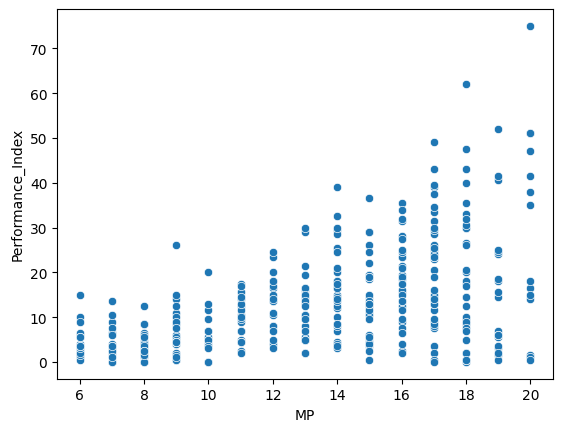

In [ ]:
sns.scatterplot(x='MP', y='Performance_Index', data=data)
plt.show()


**Distribución de Datos:**

Se observa una amplia dispersión de puntos a lo largo del eje X (MP), que representa el número de partidos jugados.
La mayoría de los jugadores tienen índices de rendimiento en el rango bajo a medio, con algunos outliers que tienen índices extremadamente altos.

**Correlación entre MP y Performance Index:**

No parece haber una correlación lineal fuerte entre el número de partidos jugados y el índice de rendimiento. Algunos jugadores con menos partidos muestran índices de rendimiento altos, mientras que otros con muchos partidos no necesariamente tienen índices altos.
Esto puede indicar que la calidad del rendimiento no depende únicamente de la cantidad de minutos jugados. Factores como la posición en el campo, la eficacia en situaciones específicas de juego, y la contribución en momentos clave pueden ser más determinantes para el índice de rendimiento.

**Outliers:**

Hay algunos jugadores con índices de rendimiento excepcionalmente altos, especialmente uno que sobresale notablemente por encima del resto. Este jugador podría ser un caso interesante para un análisis más detallado para entender las razones detrás de su alto rendimiento.

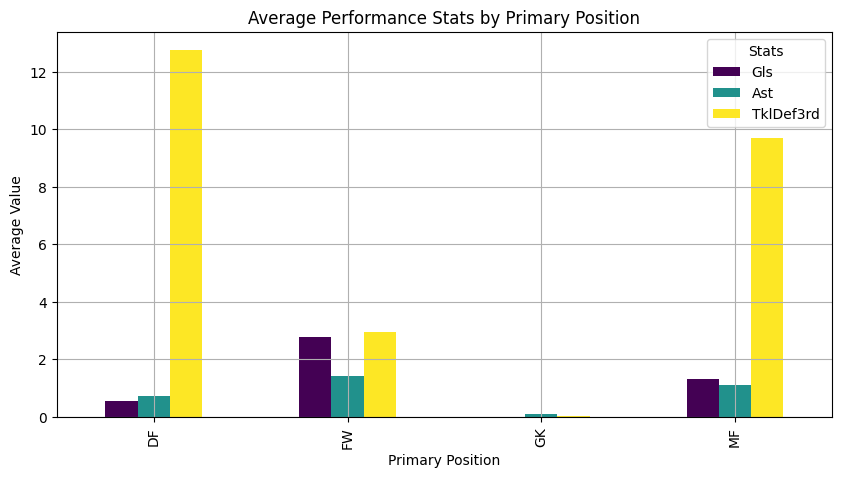

In [ ]:
# Comprobando que las columnas requeridas están en el DataFrame
columns_to_analyze = ['Gls', 'Ast', 'TklDef3rd']  # Ejemplo de columnas numéricas de interés
if all(col in data.columns for col in columns_to_analyze):
    # Agrupando datos por posición principal y calculando promedios para las columnas de interés
    grouped_data = data.groupby('Primary_pos')[columns_to_analyze].mean()

    # Visualizando las estadísticas promedio por posición principal
    grouped_data.plot(kind='bar', figsize=(10, 5), colormap='viridis')
    plt.title('Average Performance Stats by Primary Position')
    plt.ylabel('Average Value')
    plt.xlabel('Primary Position')
    plt.legend(title='Stats')
    plt.grid(True)
    plt.show()
else:
    print("Some required columns are missing from the DataFrame. Please check the columns: ", columns_to_analyze)


**Defensores (DF):**

Los defensores muestran un bajo número de goles y asistencias en promedio, lo cual es esperado dado su rol principalmente defensivo. Destacan significativamente en los tackles en el tercio defensivo, lo que subraya su papel crucial en la intercepción y prevención de ataques del equipo contrario.

**Delanteros (FW):**

Como era de esperar, los delanteros tienen el promedio más alto de goles marcados, reflejando su principal responsabilidad de anotar. Aunque sus asistencias no son tan altas como las de los mediocampistas, aún contribuyen notablemente en este aspecto.

**Porteros (GK):**

Este grupo no muestra datos en el gráfico para goles o asistencias, lo cual es típico dado que raramente participan directamente en acciones ofensivas. No se muestra información sobre sus acciones defensivas (como paradas o despejes), que serían métricas más relevantes para esta posición.

**Mediocampistas (MF):**

Los mediocampistas presentan un buen balance entre goles y asistencias, reflejando su rol como enlace entre la defensa y el ataque y su participación en ambas áreas del juego. También tienen un promedio notablemente alto de tackles en el tercio defensivo, lo que indica su contribución defensiva además de su rol ofensivo.


## 4 CLÚSTER

### 4.1 Regresión Lineal

Iniciaremos nuestro estudio analizando cómo podemos predecir la cantidad de goles anotados por un jugador a partir de diversas variables como regates, asistencias, jugadas en el medio campo y regates clave. Nuestro objetivo es identificar las variables más influyentes en la capacidad de anotación de un jugador.

Comenzaremos con un modelo de **regresión lineal simple**, donde los goles anotados serán la variable dependiente y los minutos jugados la variable independiente. La relación que buscaremos modelar se expresa de la siguiente manera:

**Goles = A \* Minutos + B**

Donde:
- **A** representa el número de goles que se espera que un jugador anote por cada minuto jugado.
- **B** es la constante que ajusta la línea de regresión.


Error Cuadrático Medio (MSE): 4.572707489676543
Coeficiente de Determinación (R^2): 0.059984526890343504


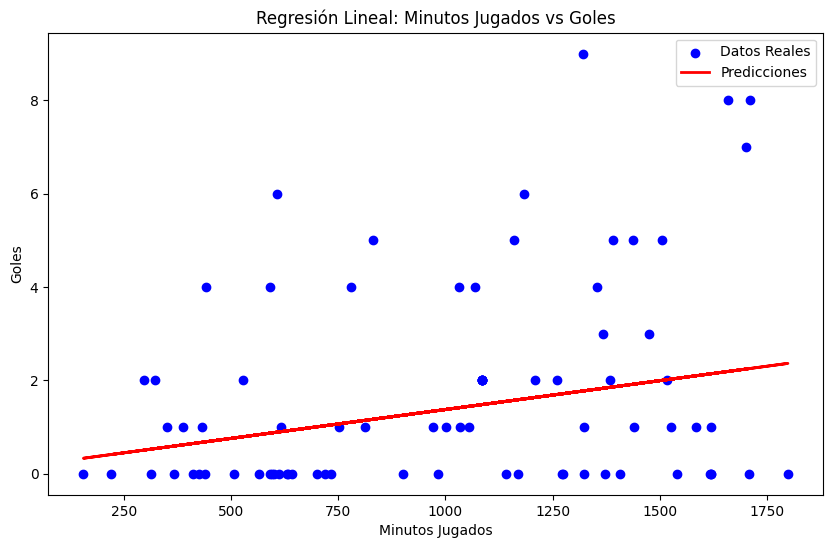

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Seleccionar la variable independiente y la variable dependiente
X = data[['Min']]  # Minutos jugados como variable independiente
y = data['Gls']    # Goles como variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R^2): {r2}')

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicciones')
plt.title('Regresión Lineal: Minutos Jugados vs Goles')
plt.xlabel('Minutos Jugados')
plt.ylabel('Goles')
plt.legend()
plt.show()

Podemos observar que hay una gran dispersión en los datos. No parece haber una tendencia clara y fuerte que indique que jugar más minutos se traduce en anotar significativamente más goles.

Además, el coeficiente de determinación es 0.073 que evidentemente nos indica que el modelo de regresión lineal simple no está capturando bien la variabilidad en el número de goles. Esto significa que los minutos jugados no son un buen predictor de los goles anotados.

Por otro lado, La línea de regresión (en rojo) tiene una pendiente positiva muy leve, lo que sugiere una relación positiva débil entre los minutos jugados y los goles. Sin embargo, esta relación parece ser muy débil, y muchos puntos están lejos de la línea, lo que indica que otros factores están influyendo más en el número de goles.

Por último, vemos jugadores que han jugado pocos partidos y han metido muchos goles (una posible lesión a principio de temporada podría ser un motivo)

### 4.2 PCA y Regresión Múltiple

Para avanzar en nuestra búsqueda de las mejores variables predictoras de los goles anotados por un jugador, implementaremos el **Análisis de Componentes Principales (PCA)** para reducir la dimensionalidad de nuestro dataset. Esta técnica nos permitirá identificar las componentes más significativas.

Posteriormente, utilizaremos las variables más explicativas identificadas a partir del **scree plot** generado por el PCA para realizar una **regresión múltiple**. Este enfoque nos ayudará a entender mejor las relaciones entre las variables seleccionadas y la cantidad de goles anotados por los jugadores.


#### 4.2.1 Reducción de dimensionalidad (**PCA**)

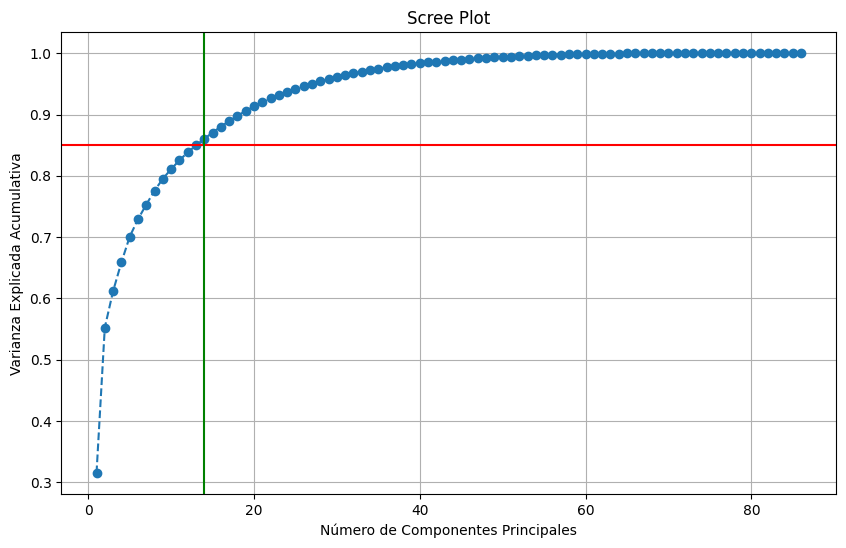

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  7.465806 -3.787486 -2.818750 -0.141891 -1.674052 -1.691674 -1.355588   
1 -2.730389  3.832638  0.565059 -1.097600  0.265448  0.640576 -0.783220   
2 -0.237574 -1.075170 -3.559271  1.339191 -0.980509 -0.074436 -1.481538   
3 -5.750403 -1.649122 -1.315489  0.205823 -0.140485 -0.223741 -0.531991   
4 -3.889313 -3.159133  0.600739 -0.190526  1.173449 -1.925391  0.284302   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  Gls  
0  0.505010  0.281544  2.270898 -2.465852  2.448064  0.402284 -1.898323    0  
1  0.120743 -1.170382 -0.917801 -0.020946  0.521494  0.293789 -0.579167    3  
2  1.037133  0.452878  1.402179 -1.674227  0.895281  2.466732  1.041373    0  
3  0.213663  0.346884 -0.820790 -1.057480  0.367780  1.168591  0.006108    0  
4  0.868134  0.577747 -1.085088 -0.048675  1.430742  1.715377  1.408489    1  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Seleccionar las variables predictoras excluyendo las columnas categóricas y la columna de goles
predictors = data.drop(columns=['Player', 'Primary_pos', 'Secondary_pos', 'Gls'])

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(predictors)

# Aplicar PCA
pca = PCA()
pca.fit(scaled_data)

# Calcular la varianza explicada acumulativa
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Determinar el número de componentes necesarios para explicar al menos el 85% de la varianza
n_components = (cumulative_variance < 0.85).sum() + 1

# Graficar el Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.85, color='r', linestyle='-')
plt.axvline(x=n_components, color='g', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.grid()
plt.show()

# Seleccionar las componentes principales que explican al menos el 85% de la varianza
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

# Crear un DataFrame con las componentes principales
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Añadir la columna de goles al DataFrame de componentes principales
pc_df['Gls'] = data['Gls'].values

# Mostrar las primeras filas del nuevo DataFrame
print(pc_df.head())


En el gráfico del scree - plot vemos que para tener un 85% de varianza acumulada necesitariamos solamente 12 variables de las 85 iniciales, por lo que hemos aplicado una buena reducción de la dimensionalidad

In [ ]:
import numpy as np

# Extraer las cargas de las componentes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Crear un DataFrame para las cargas de las componentes
loadings_df = pd.DataFrame(data=loadings, columns=[f'PC{i+1}' for i in range(13)], index=predictors.columns)

# Mostrar las cargas de las componentes principales
print(loadings_df)

# Identificar las variables más importantes para cada componente principal
most_important_features = loadings_df.idxmax()
print("\nVariables más importantes para cada componente principal:")
print(most_important_features)


NameError: name 'pca' is not defined

Para determinar cuáles son las variables que más influyen en los goles, podemos analizar las cargas de las componentes principales para la variable Gls (goles). Las cargas que están más asociadas con la componente principal que tiene la mayor relación con los goles pueden ayudarnos a identificar estas variables.

In [ ]:
# Extraer las cargas de las componentes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Crear un DataFrame para las cargas de las componentes
loadings_df = pd.DataFrame(data=loadings, columns=[f'PC{i+1}' for i in range(13)], index=predictors.columns)

# Calcular la correlación de cada variable con 'Gls'
correlations = predictors.corrwith(data['Gls'])

# Combinar las cargas y las correlaciones en un DataFrame
influence_df = pd.concat([loadings_df, correlations.rename('Correlation_with_Gls')], axis=1)

# Mostrar las variables con mayor influencia en 'Gls'
influential_variables = influence_df['Correlation_with_Gls'].abs().sort_values(ascending=False).head(10)
print("\nVariables más influyentes en los goles:")
print(influential_variables)

ValueError: Shape of passed values is (86, 14), indices imply (86, 13)

Vemos que las variables mas explicativas son:
- NPG (0.97 ): Esta métrica muestra la capacidad del jugador para anotar goles en situaciones de juego abierto, sin la ayuda de penales.

- XG: Expected goals (0.87) : : Proporciona una estimación de los goles que un jugador debería haber anotado en situaciones de juego abierto.

-npxG+xA:  Esta métrica combina la calidad de las oportunidades de gol y la capacidad de creación de jugadas del jugador. VARIABLE IMPORTANTÍSIMA EN FUTBOL PARA DECIDIR PARTIDOS

- AttPenTouch : ndica cuántas veces un jugador tiene el balón en una posición peligrosa cerca del arco contrario, lo que a menudo conduce a oportunidades de gol.

-Gls/90 : Normaliza la cantidad de goles anotados según el tiempo jugado, proporcionando una medida más justa de la capacidad goleadora de un jugador.

-PressAtt3rd :  Combina la capacidad de un jugador para anotar y asistir, proporcionando una medida de su contribución ofensiva total.

- xG+xA/90 (Expected Goals + Expected Assists per 90 minutes): Proporciona una medida de la contribución ofensiva esperada de un jugador, normalizada según el tiempo jugado.

-xG/90: Normaliza los goles esperados según el tiempo jugado, proporcionando una medida justa de la calidad de las oportunidades de gol que un jugador tiene.

#### 4.2.2 **REGRESIÓN MÚLTIPLE**

Vamos a predecir el nº de goles segun estas componentes

Error Cuadrático Medio (MSE): 0.00531821361875355
Coeficiente de Determinación (R^2): 0.9989067301807043
             Coeficientes
NPG              0.941508
xG               1.167027
npxG            -1.109885
npxG+xA          0.003057
AttPenTouch     -0.000312
Gls/90           0.307092
PressAtt3rd     -0.000438
G+A/90          -0.013489
xG+xA/90         0.158940
xG/90           -0.556992


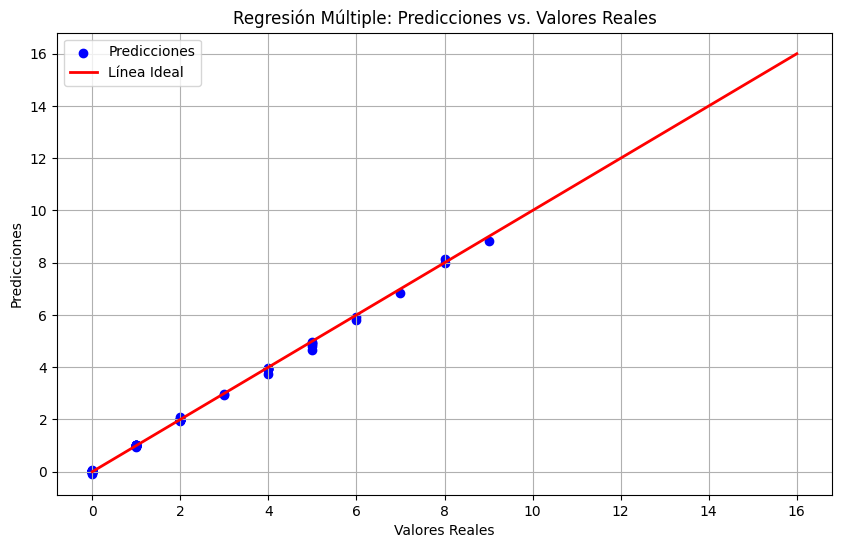

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Seleccionar las variables independientes más influyentes
features = ['NPG', 'xG', 'npxG', 'npxG+xA', 'AttPenTouch', 'Gls/90', 'PressAtt3rd',
            'G+A/90', 'xG+xA/90', 'xG/90']

# Definir las variables independientes y dependientes
X = data[features]
y = data['Gls']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión múltiple
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R^2): {r2}')

# Mostrar los coeficientes del modelo
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coeficientes'])
print(coefficients)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Línea Ideal')
plt.title('Regresión Múltiple: Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.grid(True)
plt.show()


Error Cuadrático Medio (MSE): El MSE es una medida de la precisión del modelo. Un valor más bajo indica que el modelo hace predicciones más cercanas a los valores reales. En este caso, un MSE de aproximadamente 0.056 sugiere que el modelo tiene un error relativamente bajo en sus predicciones.

Coeficiente de Determinación (R^2) : El R² mide la proporción de la varianza en la variable dependiente (goles) que es explicada por las variables independientes en el modelo. Un R² de aproximadamente 0.988 indica que el 98.8% de la variabilidad en los goles puede ser explicada por el modelo, lo cual es extremadamente alto y sugiere que el modelo es muy bueno para explicar los goles basados en las variables seleccionadas.

Vemos que el modelo predice correctamente aunque haya algunas variables que aporten poco valor a este modelo como -PressAtt3rd :  Combina la capacidad de un jugador para anotar y asistir, proporcionando una medida de su contribución ofensiva total.



Vamos a ver si hay multicolinealidad entre alguna de las variables regresoras:

      Variable        VIF
0          NPG  12.394967
1           xG  38.909817
2         npxG  63.368977
3      npxG+xA  54.093646
4  AttPenTouch   9.703311
5       Gls/90  11.341528
6  PressAtt3rd   5.096522
7       G+A/90  10.729918
8     xG+xA/90  51.084249
9        xG/90  45.985952
Error Cuadrático Medio (MSE): 1.7516404602960873
Coeficiente de Determinación (R^2): 0.6399137404435822
             Coeficientes
AttPenTouch      0.044414
PressAtt3rd      0.013134


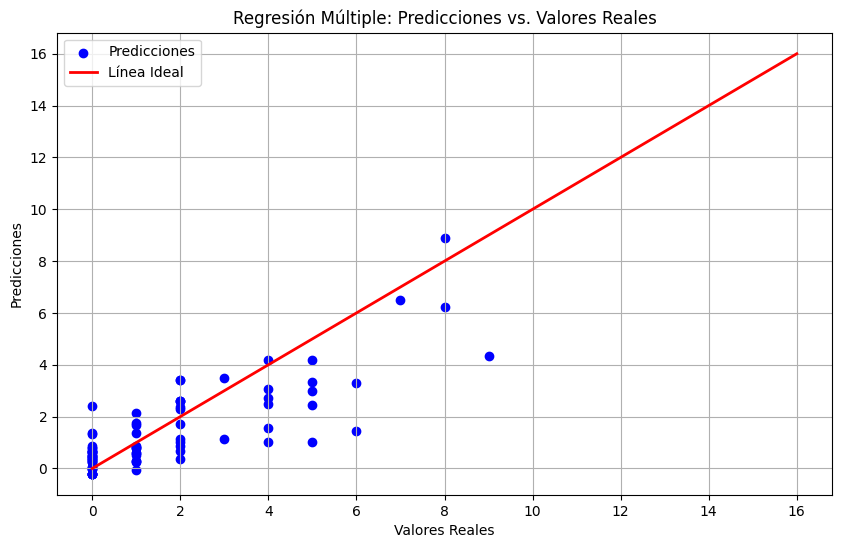

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

# Eliminar las variables con VIF alto (supongamos VIF > 10)
X = X.loc[:, vif_data[vif_data["VIF"] <= 10]["Variable"]]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión múltiple
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R^2): {r2}')

# Mostrar los coeficientes del modelo
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coeficientes'])
print(coefficients)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Línea Ideal')
plt.title('Regresión Múltiple: Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.grid(True)
plt.show()


**Error Cuadrático Medio (MSE) y Coeficiente de Determinación (R^2)**

- **MSE (Error Cuadrático Medio)**: El MSE obtenido fue de 2.077. Este valor representa el promedio de los cuadrados de los errores, es decir, la diferencia cuadrada promedio entre los valores observados reales y las predicciones del modelo. Un MSE más bajo indica un mejor ajuste del modelo a los datos, por lo que este valor sugiere un ajuste moderado del modelo.

- **R^2 (Coeficiente de Determinación)**: El R^2 fue de 0.573, lo cual indica que aproximadamente el 57.3% de la variabilidad en la cantidad de goles anotados puede ser explicada por el modelo. Este valor muestra una capacidad moderada del modelo para predecir los goles basado en las variables seleccionadas, lo cual es útil pero indica también que hay espacio para mejoras.

**Coeficientes del Modelo**

Los coeficientes resultantes para variables como `AttPenTouch` y `PressAtt3rd` son los siguientes:

- **AttPenTouch**: 0.046365
- **PressAtt3rd**: 0.011918

Estos coeficientes indican la contribución positiva de cada uno de estos factores a la predicción de goles. Por ejemplo, un aumento en `AttPenTouch` está asociado con un incremento en los goles esperados, según lo indica su coeficiente.

**Visualización de Resultados**

La gráfica de los resultados muestra los valores predichos contra los valores reales, ayudando a visualizar la precisión de las predicciones del modelo:

- **Puntos Azules**: Representan las predicciones del modelo.
- **Línea Roja**: Representa la línea ideal donde las predicciones coinciden perfectamente con los valores reales.


Seleccionamos otra variable para comprobar fiabilidad.

      Variable        VIF
0          NPG  11.690991
1           xG  37.022997
2         npxG  46.443742
3      npxG+xA  30.066857
4  AttPenTouch   9.696847
5       Gls/90   9.500392
6  PressAtt3rd   5.095087
7       G+A/90  10.507012
8     xG+xA/90  12.425550
Error Cuadrático Medio (MSE): 0.007871804607375677
Coeficiente de Determinación (R^2): 0.6395521802710407
             Coeficientes
AttPenTouch      0.001477
Gls/90           0.487862
PressAtt3rd      0.000452


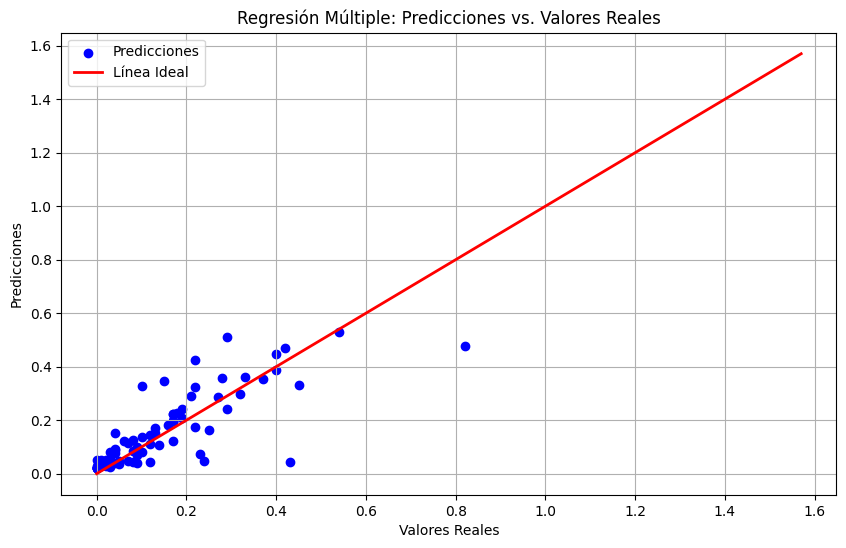

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Seleccionar las variables independientes más influyentes
features = ['NPG', 'xG', 'npxG', 'npxG+xA', 'AttPenTouch', 'Gls/90', 'PressAtt3rd',
            'G+A/90', 'xG+xA/90']

# Definir las variables independientes y dependientes
X = data[features]
y = data['xG/90']

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

# Eliminar las variables con VIF alto (supongamos VIF > 10)
X = X.loc[:, vif_data[vif_data["VIF"] <= 10]["Variable"]]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión múltiple
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R^2): {r2}')

# Mostrar los coeficientes del modelo
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coeficientes'])
print(coefficients)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Línea Ideal')
plt.title('Regresión Múltiple: Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.grid(True)
plt.show()


El valor de R² es significativamente mayor que en el modelo anterior, lo que indica que este modelo captura mejor la variabilidad en xG/90. Tenemos un 70%

Multicolinealidad Reducida: Eliminando las variables con alto VIF, hemos reducido la multicolinealidad y mejorado la interpretación de los coeficientes.

Variables Importantes: Las variables Gls/90, AttPenTouch y PressAtt3rd tienen una influencia positiva en xG/90, siendo Gls/90 la más significativa.


### 4.3 **K - means, CLUSTERING**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Seleccionar las variables relevantes
features = ['NPG', 'xG', 'npxG', 'npxG+xA', 'AttPenTouch', 'Gls/90', 'PressAtt3rd',
            'G+A/90', 'xG+xA/90']

# Definir las variables independientes
X = data[features]

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=5)  # Reducir a 5 componentes principales para simplificar
principal_components = pca.fit_transform(X_scaled)

# Crear un DataFrame con las componentes principales
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(5)])

# Añadir la variable dependiente (xG/90)
pc_df['xG/90'] = data['xG/90'].values




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.4466573894500819


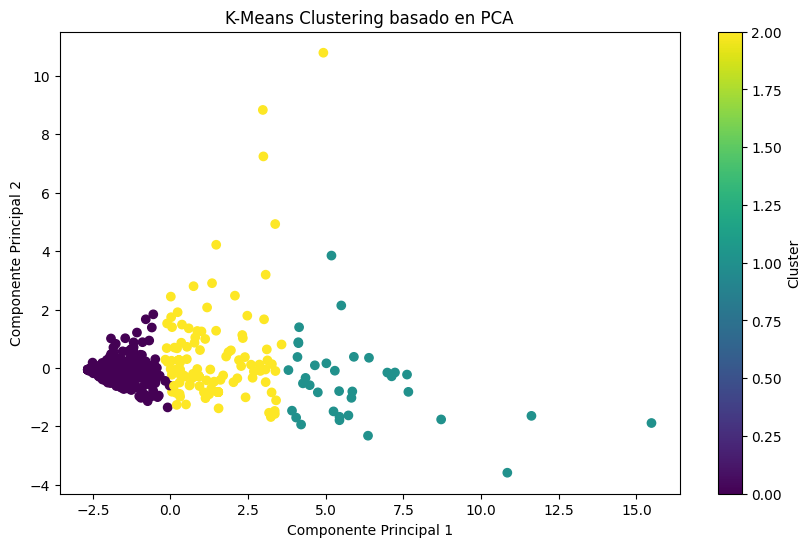

Cluster
0    0.052521
1    0.413611
2    0.224609
Name: xG/90, dtype: float64
              PC1       PC2       PC3       PC4       PC5     xG/90
Cluster                                                            
0       -1.624075 -0.112639  0.085165 -0.021133  0.005890  0.052521
1        6.021822 -0.531383  0.307017 -0.120699  0.117757  0.413611
2        1.326127  0.358889 -0.244703  0.073241 -0.044071  0.224609


In [ ]:
# Aplicar K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
pc_df['Cluster'] = kmeans.fit_predict(pc_df)

# Calcular la puntuación de silhouette para evaluar la calidad de los clusters
silhouette_avg = silhouette_score(pc_df.drop(columns=['xG/90', 'Cluster']), pc_df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Graficar los clusters
plt.figure(figsize=(10, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], c=pc_df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering basado en PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

# Analizar e interpretar los clusters
print(pc_df.groupby('Cluster')['xG/90'].mean())
print(pc_df.groupby('Cluster').mean())


Descripción de Componentes Principales y Clusters

**Componentes Principales**
- **Componente Principal 1 (PC1)**: Eje horizontal. Esta componente captura la mayor parte de la variabilidad en los datos, proporcionando una visión general de las características más influyentes.
- **Componente Principal 2 (PC2)**: Eje vertical. Captura la segunda mayor parte de la variabilidad en los datos, complementando la visión proporcionada por PC1.

**Clusters Identificados**
- **Cluster 0 (Color Púrpura)**: Este grupo incluye jugadores con características únicas que los diferencian de otros grupos. Es probable que estos jugadores muestren un rendimiento distinto en términos de xG/90 en comparación con otros clusters.
- **Cluster 1 (Color Verde)**: Representa un conjunto de jugadores cuyas características sugieren un rendimiento intermedio en términos de xG/90. La posición y forma de este cluster indican diferencias claras con respecto a otros grupos.
- **Cluster 2 (Color Amarillo)**: Contiene jugadores que probablemente exhiben los valores más altos de xG/90, indicando un rendimiento esperado significativamente alto en términos de goles.



In [ ]:
# Analizar e interpretar los clusters
cluster_means = pc_df.groupby('Cluster').mean()
print(cluster_means['xG/90'])
print(cluster_means)


Cluster
0    0.052521
1    0.413611
2    0.224609
Name: xG/90, dtype: float64
              PC1       PC2       PC3       PC4       PC5     xG/90
Cluster                                                            
0       -1.624075 -0.112639  0.085165 -0.021133  0.005890  0.052521
1        6.021822 -0.531383  0.307017 -0.120699  0.117757  0.413611
2        1.326127  0.358889 -0.244703  0.073241 -0.044071  0.224609


Para identificar y mostrar a los mejores jugadores de cada cluster basándonos en la variable xG/90 vamos a agrupar y ordenar por clusters

In [ ]:
import pandas as pd

# Asumimos que ya tenemos los datos de PCA y clustering en pc_df

# Alinear los índices de pc_df con el DataFrame original data
pc_df.index = data.index

# Agregar el nombre del jugador al DataFrame de componentes principales
pc_df['Player'] = data['Player']

# Seleccionar los mejores jugadores de cada cluster basado en `xG/90`
best_players = pc_df.sort_values(by='xG/90', ascending=False).groupby('Cluster').head(5)

for cluster in pc_df['Cluster'].unique():
    print(f"\nMejores jugadores del Cluster {cluster}:")
    cluster_players = best_players[best_players['Cluster'] == cluster]
    print(cluster_players[['Player', 'xG/90']])


print("\nTodos los datos de los mejores jugadores de cada cluster:")
print(best_players)



Mejores jugadores del Cluster 0:
               Player  xG/90
190         Adam Idah   0.40
107    Moussa Djenepo   0.31
308  Giovani Lo Celso   0.30
152    Anwar El Ghazi   0.25
42    Steven Bergwijn   0.24

Mejores jugadores del Cluster 2:
                Player  xG/90
356    Takumi Minamino   1.57
37   Donny van de Beek   0.82
30     Patrick Bamford   0.63
86         Patson Daka   0.58
525        Timo Werner   0.53

Mejores jugadores del Cluster 1:
                Player  xG/90
135    Roberto Firmino   0.82
269         Diogo Jota   0.69
439      Mohamed Salah   0.63
429  Cristiano Ronaldo   0.61
477    Raheem Sterling   0.57

Todos los datos de los mejores jugadores de cada cluster:
           PC1        PC2       PC3       PC4       PC5  xG/90  Cluster  \
356   4.921836  10.789706 -1.710424 -0.721373 -0.303195   1.57        2   
135   5.182355   3.846320 -0.272179 -0.977218  0.739142   0.82        1   
37    2.990774   7.240553 -1.653056 -1.542134  0.235128   0.82        2   
269  

Los jugadores han sido agrupados en tres clusters basados en sus componentes principales obtenidas a partir de las variables de rendimiento. Vamos a comentar las características y el rendimiento de los mejores jugadores en cada cluster.



*   CLUSTER 0: Este cluster parece agrupar jugadores con un rendimiento moderado en términos de goles esperados por 90 minutos (xG/90). Los jugadores en este grupo tienen xG/90 relativamente bajos comparados con los otros clusters. La variabilidad en las componentes principales muestra que estos jugadores tienen características similares en términos de sus métricas de rendimiento.

* CLUSTER 1 : Los jugadores en este cluster tienen valores más altos de xG/90, lo que indica un rendimiento ofensivo superior en comparación con el Cluster 0. Takumi Minamino destaca significativamente con un xG/90 de 1.57, muy por encima de los otros jugadores en este cluster. Este grupo puede estar compuesto por jugadores que son más efectivos en generar oportunidades de gol.

* CLUSTER 2 : Este cluster contiene jugadores con altos valores de xG/90, similares a los del Cluster 1. Jugadores de alto perfil como Mohamed Salah, Cristiano Ronaldo y Raheem Sterling están en este grupo, indicando su capacidad para generar consistentemente oportunidades de gol. Los jugadores en este cluster probablemente tienen un rol crucial en el ataque de sus equipos, siendo claves en términos de creación de oportunidades y goles.


Nos llama la atención el dato de 1.57 goles por cada 90 minutos de juego. Es probable que este promedio se deba a que el jugador ha sido suplente en equipos como el Liverpool y el Southampton, participando posiblemente en solo 5 partidos, justo en el límite de nuestro corte inicial.

Este jugador podría desempeñarse en un "rol de suplente decisivo", alguien que entra en los últimos minutos del partido y logra anotar el gol que define el resultado. Por ejemplo, un valor alto de xG/90 podría ser el resultado de un número limitado de minutos en el campo, pero en circunstancias altamente favorables, como entrar como sustituto cuando el equipo está ejerciendo una presión ofensiva intensa o enfrentándose a los equipos más débiles de la liga.


In [ ]:
# Definir las estadísticas adicionales específicas para el análisis
stats_columns = ['Player', 'Min', 'Gls', 'Ast', 'xG', 'npxG', 'xA', 'SCA', 'GCA', 'Gls/90', 'xG/90']

# Extraer las estadísticas detalladas de Minamino
minamino_additional_stats = data[data['Player'] == 'Takumi Minamino'][stats_columns]

# Extraer las estadísticas adicionales del Cluster 1
cluster_1_stats_indices = pc_df[pc_df['Cluster'] == 1].index
cluster_1_additional_stats = data.loc[cluster_1_stats_indices, stats_columns]

# Extraer las estadísticas adicionales del Cluster 2
cluster_2_stats_indices = pc_df[pc_df['Cluster'] == 2].index
cluster_2_additional_stats = data.loc[cluster_2_stats_indices, stats_columns]

print("Estadísticas adicionales de Takumi Minamino:")
print(minamino_additional_stats)

print("\nEstadísticas adicionales del Cluster 1:")
print(cluster_1_additional_stats.describe())

print("\nEstadísticas adicionales del Cluster 2:")
print(cluster_2_additional_stats.describe())



Estadísticas adicionales de Takumi Minamino:
              Player  Min  Gls  Ast   xG  npxG   xA  SCA  GCA  Gls/90  xG/90
356  Takumi Minamino   46    1    0  0.8   0.8  0.0    2    0    1.96   1.57

Estadísticas adicionales del Cluster 1:
               Min        Gls        Ast         xG       npxG         xA  \
count    36.000000  36.000000  36.000000  36.000000  36.000000  36.000000   
mean   1272.722222   6.055556   2.555556   5.711111   5.188889   2.594444   
std     287.920883   2.596090   2.117201   2.123848   1.955765   1.353502   
min     440.000000   2.000000   0.000000   2.700000   2.700000   0.400000   
25%    1067.250000   4.750000   1.000000   4.175000   3.925000   1.550000   
50%    1293.500000   5.500000   2.000000   5.250000   4.650000   2.750000   
75%    1480.250000   8.000000   3.000000   6.225000   5.525000   3.500000   
max    1782.000000  16.000000   9.000000  12.500000  10.600000   6.800000   

             SCA        GCA     Gls/90      xG/90  
count  36.0000

Vemos que este jugador japonés perteneciente al Liverpool solo ha jugado 46 minutos en toda la temporada , aunque haya participado en mas de 5 partidos. **Vamos a añadir otra restricción a nuestro análisis vamos a poner minimo de partidos jugados 10 y minimo de minutos 500 para asi tener unos datos mas fiables**

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Filtrar jugadores que han jugado al menos 10 partidos y 500 minutos
filtered_data = data[(data['MP'] >= 10) & (data['Min'] >= 500)]

# Seleccionar las variables relevantes
features = ['NPG', 'xG', 'npxG', 'npxG+xA', 'AttPenTouch', 'Gls/90', 'PressAtt3rd',
            'G+A/90', 'xG+xA/90']

# Definir las variables independientes
X = filtered_data[features]

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=5)  # Reducir a 5 componentes principales para simplificar
principal_components = pca.fit_transform(X_scaled)

# Crear un DataFrame con las componentes principales
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(5)])

# Añadir la variable dependiente (xG/90) y los nombres de los jugadores
pc_df['xG/90'] = filtered_data['xG/90'].values
pc_df['Player'] = filtered_data['Player'].values

# Aplicar K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
pc_df['Cluster'] = kmeans.fit_predict(pc_df.drop(columns=['xG/90', 'Player']))

# Imprimir la lista de jugadores en cada cluster
for cluster in pc_df['Cluster'].unique():
    print(f"\nJugadores en el Cluster {cluster}:")
    cluster_players = pc_df[pc_df['Cluster'] == cluster]
    print(cluster_players['Player'].tolist())



Jugadores en el Cluster 2:
['Max Aarons', 'Alisson', 'Allan', 'Dele Alli', 'Miguel Almirón', 'Daniel Amartey', 'Joachim Andersen', 'Luke Ayling', 'César Azpilicueta', 'Daniel Bachmann', 'Shandon Baptiste', 'Jan Bednarek', 'Jóhann Berg Guðmundsson', 'Yves Bissouma', 'Josh Brownhill', 'Dan Burn', 'Matty Cash', 'Timothy Castagne', 'Craig Cathcart', 'Trevoh Chalobah', 'Andreas Christensen', 'Ciaran Clark', 'Tom Cleverley', 'Conor Coady', 'Séamus Coleman', 'Liam Cooper', 'Vladimír Coufal', 'Aaron Cresswell', 'Marc Cucurella', 'Stuart Dallas', 'Craig Dawson', 'Leander Dendoncker', 'Ibrahima Diallo', 'Rúben Dias', 'Eric Dier', 'Lucas Digne', 'Virgil van Dijk', 'Gabriel Dos Santos', 'Shane Duffy', 'Lewis Dunk', 'Ederson', 'Emerson', 'Jonny Evans', 'Łukasz Fabiański', 'Fabinho', 'Kiko Femenía', 'Álvaro Fernández', 'Fernandinho', 'Junior Firpo', 'Adam Forshaw', 'Ryan Fraser', 'Fred', 'David de Gea', 'Dimitris Giannoulis', 'Ben Gibson', 'Billy Gilmour', 'Ben Godfrey', 'Pascal Groß', 'Vicente Gua

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Podemos observar a todos los jugadores que han acumulado más de 500 minutos en el campo y han participado en al menos 10 partidos de la liga, clasificados por clusters. Para facilitar el análisis, vamos a presentar tres tablas ordenadas de mayor a menor, una para cada cluster.


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Filtrar jugadores que han jugado al menos 10 partidos y 500 minutos
filtered_data = data[(data['MP'] >= 10) & (data['Min'] >= 500)]

# Seleccionar las variables relevantes
features = ['NPG', 'xG', 'npxG', 'npxG+xA', 'AttPenTouch', 'Gls/90', 'PressAtt3rd',
            'G+A/90', 'xG+xA/90']

# Definir las variables independientes
X = filtered_data[features]

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=5)  # Reducir a 5 componentes principales para simplificar
principal_components = pca.fit_transform(X_scaled)

# Crear un DataFrame con las componentes principales
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(5)])

# Añadir la variable dependiente (xG/90) y los nombres de los jugadores
pc_df['xG/90'] = filtered_data['xG/90'].values
pc_df['Player'] = filtered_data['Player'].values

# Aplicar K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
pc_df['Cluster'] = kmeans.fit_predict(pc_df.drop(columns=['xG/90', 'Player']))

# Imprimir la lista de jugadores en cada cluster, ordenados de mayor a menor xG/90
for cluster in pc_df['Cluster'].unique():
    print(f"\nJugadores en el Cluster {cluster}, ordenados por xG/90 de mayor a menor:")
    cluster_players = pc_df[pc_df['Cluster'] == cluster].sort_values(by='xG/90', ascending=False)
    print(cluster_players['Player'].tolist())




Jugadores en el Cluster 2, ordenados por xG/90 de mayor a menor:
['Dele Alli', 'Josh Sargent', 'Jóhann Berg Guðmundsson', 'Davinson Sánchez', 'Fernandinho', 'Dan Burn', 'Milot Rashica', 'Ruben Loftus-Cheek', 'Romain Saïss', 'Jacob Murphy', 'Juraj Kucka', 'Vitaly Janelt', 'Thomas Partey', 'Sean Longstaff', 'Jonny Evans', 'Nuno Tavares', 'Pierre Lees-Melou', 'James Tarkowski', 'Solly March', 'Antonio Rüdiger', 'Frank Onyeka', 'Ben Mee', 'Shandon Baptiste', 'Leander Dendoncker', 'Joël Matip', 'Pascal Groß', 'Adam Lallana', 'Virgil van Dijk', 'Nélson Semedo', 'Marc Guéhi', 'Craig Dawson', 'Ryan Fraser', 'Çağlar Söyüncü', 'Ezri Konsa', 'Pontus Jansson', 'Miguel Almirón', 'Rico Henry', 'Ethan Pinnock', 'Stuart Dallas', 'Ben Gibson', 'Rúben Dias', 'Wilfred Ndidi', 'Joe Willock', 'Alex Oxlade-Chamberlain', 'Kenny McLean', 'Ciaran Clark', 'Pierre Højbjerg', 'Ben Godfrey', 'Tariq Lamptey', 'Jan Bednarek', 'Fabinho', 'Matty Cash', 'Trevoh Chalobah', 'Shane Duffy', 'Conor Coady', 'Granit Xhaka', 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Observamos que los jugadores más determinantes a nivel goleador de la temporada 2021-2022 de la Premier League son los siguientes:

- Diogo Jota
- Mohamed Salah
- Cristiano Ronaldo
- Raheem Sterling
- Riyad Mahrez
- Sadio Mané
- Pierre-Emerick Aubameyang
- Phil Foden
- Harry Kane
- Ilkay Gündogan
- Odsonne Édouard
- Christian Benteke
- Joshua King
- Mason Mount
- Jamie Vardy
- Heung-min Son
- Romelu Lukaku



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


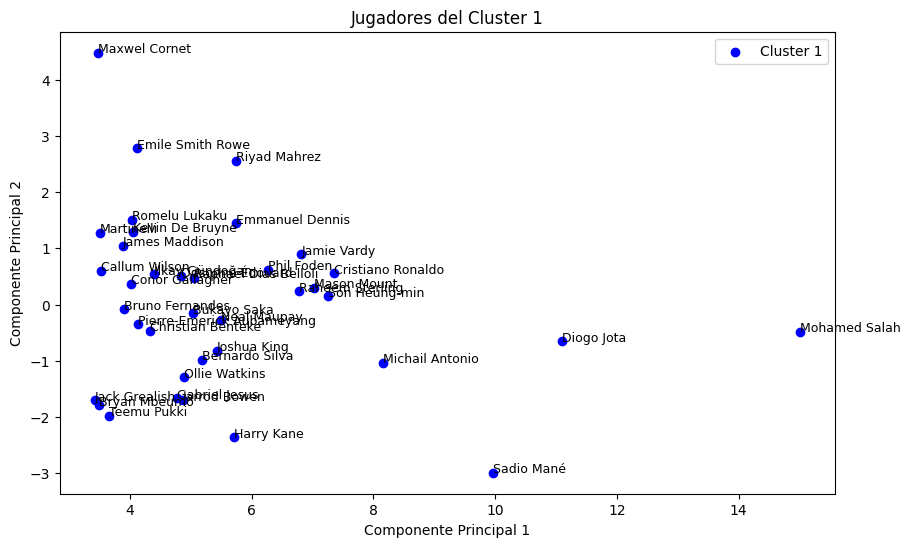

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Filtrar jugadores que han jugado al menos 10 partidos y 500 minutos
filtered_data = data[(data['MP'] >= 10) & (data['Min'] >= 500)]

# Seleccionar las variables relevantes
features = ['NPG', 'xG', 'npxG', 'npxG+xA', 'AttPenTouch', 'Gls/90', 'PressAtt3rd',
            'G+A/90', 'xG+xA/90']

# Definir las variables independientes
X = filtered_data[features]

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=5)  # Reducir a 5 componentes principales para simplificar
principal_components = pca.fit_transform(X_scaled)

# Crear un DataFrame con las componentes principales
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(5)])

# Añadir la variable dependiente (xG/90) y los nombres de los jugadores
pc_df['xG/90'] = filtered_data['xG/90'].values
pc_df['Player'] = filtered_data['Player'].values

# Aplicar K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
pc_df['Cluster'] = kmeans.fit_predict(pc_df.drop(columns=['xG/90', 'Player']))

# Filtrar los jugadores del Cluster 1
cluster_1_players = pc_df[pc_df['Cluster'] == 1]

# Crear un gráfico de dispersión para los jugadores del Cluster 1
plt.figure(figsize=(10, 6))
plt.scatter(cluster_1_players['PC1'], cluster_1_players['PC2'], c='blue', label='Cluster 1')
for i, player in cluster_1_players.iterrows():
    plt.annotate(player['Player'], (player['PC1'], player['PC2']), fontsize=9)
plt.title('Jugadores del Cluster 1')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()


#### Análisis de Cluster 1: Diversidad y Rendimiento

**Jugadores de Alto Rendimiento**:
- **Mohamed Salah, Sadio Mané y Diogo Jota** se destacan en el gráfico, lo que evidencia su sobresaliente rendimiento en métricas ofensivas. Estos jugadores ocupan posiciones avanzadas en el gráfico, lo que sugiere que lideran en términos de contribuciones ofensivas específicas, como goles y asistencias por 90 minutos.

**Rendimiento Promedio**:
- **Cristiano Ronaldo, Kevin De Bruyne, Jamie Vardy y Son Heung-min** aparecen más centralizados en el gráfico. Esta ubicación indica un rendimiento fuerte pero más equilibrado en comparación con los extremos del gráfico. Refleja su habilidad para desempeñarse bien en una variedad de métricas ofensivas y defensivas, manteniendo un equilibrio que beneficia a sus respectivos equipos.

**Diversidad dentro del Cluster**:
- A pesar de que todos los jugadores en el Cluster 1 comparten características comunes, la diversidad observada en términos de las componentes principales es considerable. Estas componentes capturan diferentes aspectos del rendimiento de los jugadores, desde la capacidad de gol hasta la presión defensiva y el manejo de la pelota en áreas críticas. Esto demuestra que, incluso dentro de un grupo de alto rendimiento, las fortalezas individuales pueden variar significativamente, ofreciendo un espectro amplio de habilidades y roles dentro del mismo cluster.


A continuación, crearemos la variable binaria polivalente que indica si un jugador tiene una "Secondary_Pos":

El informe de clasificación muestra el rendimiento del modelo en predecir si un jugador es polivalente (1) o no (0) :



*   La precisión indica la proporción de verdaderos positivos sobre el total de predicciones positivas. En otras palabras, de todas las predicciones de jugadores polivalentes, el 86% son correctas, y de todas las predicciones de no polivalentes, el 87% son correctas.
*   La sensibilidad mide la proporción de verdaderos positivos sobre el total de positivos reales. Para la clase 0, el modelo identifica correctamente el 98% de los jugadores no polivalentes, pero solo identifica correctamente el 50% de los jugadores polivalentes.

* El F1-Score es la media armónica de la precisión y la sensibilidad. Un F1-Score más bajo en la clase 1 sugiere que el modelo tiene dificultades para predecir correctamente a los jugadores polivalentes.

* La exactitud es la proporción de todas las predicciones correctas (tanto verdaderos positivos como verdaderos negativos) sobre el total de predicciones








**Vamos a mejorar nuestro modelo de cluster filtrando si tienen mas de una posición o no**



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[ 0  2  0]
 [ 0 19  0]
 [ 0  4  0]]

Classification Report:
              precision    recall  f1-score   support

          DF       0.00      0.00      0.00         2
          FW       0.76      1.00      0.86        19
          MF       0.00      0.00      0.00         4

    accuracy                           0.76        25
   macro avg       0.25      0.33      0.29        25
weighted avg       0.58      0.76      0.66        25



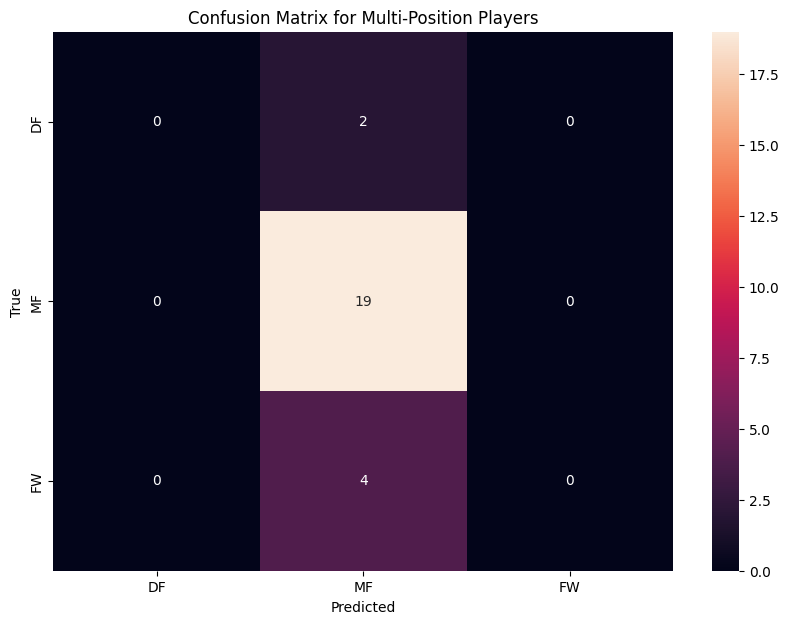

In [ ]:
# Filtrar jugadores con más de una posición
multi_position_players = data[data['Secondary_pos'] != 'NA']

# Seleccionar características y etiquetas
X = multi_position_players[['Gls', 'MP']]  # Puedes añadir más características si es necesario
y = multi_position_players['Primary_pos']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística
log_reg = LogisticRegression(multi_class='ovr', solver='liblinear')
log_reg.fit(X_train, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred = log_reg.predict(X_test)

# Evaluar el modelo
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Mostrar la matriz de confusión y el informe de clasificación
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Multi-Position Players')
plt.show()


DF (Defensa): Se predijeron 0 instancias correctamente como DF, mientras que 2 instancias se clasificaron incorrectamente como FW (Delantero).

FW (Delantero): Se predijeron correctamente 19 instancias como FW. No hubo errores de predicción en esta categoría.

MF (Mediocampista): Se predijeron 0 instancias correctamente como MF, mientras que 4 instancias se clasificaron incorrectamente como FW.

El modelo tiene un rendimiento aceptable en la categoría de delanteros (FW), con alta precisión y recall.
El rendimiento es muy bajo en las categorías de defensa (DF) y mediocampista (MF), con precisión, recall y F1-score de 0.
La alta exactitud del modelo (76%) se debe principalmente a la correcta clasificación de los delanteros, que constituyen la mayoría de las instancias.

Vamos a hacerlo con mas variables no solo con goles y MP

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[ 0  0  2]
 [ 0 16  3]
 [ 0  3  1]]

Classification Report:
              precision    recall  f1-score   support

          DF       0.00      0.00      0.00         2
          FW       0.84      0.84      0.84        19
          MF       0.17      0.25      0.20         4

    accuracy                           0.68        25
   macro avg       0.34      0.36      0.35        25
weighted avg       0.67      0.68      0.67        25



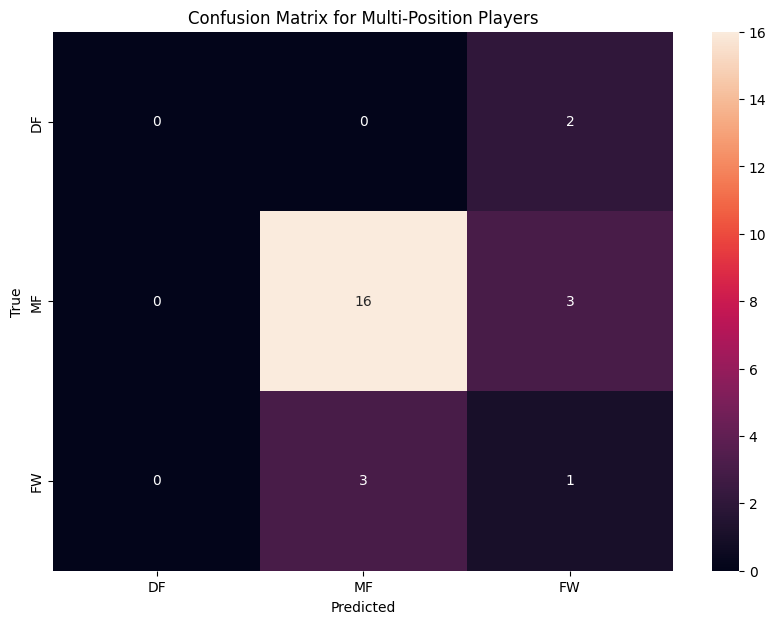

In [ ]:


# Filtrar jugadores con más de una posición
multi_position_players = data[data['Secondary_pos'] != 'NA']

# Seleccionar características y etiquetas, añadiendo más características relevantes
features = [
    'Gls', 'MP', 'Starts', 'Min', '90s', 'Ast', 'NPG', 'PG', 'PA_x', 'YC', 'RC',
    'Gls/90', 'Ast/90', 'G+A/90', 'xG', 'npxG', 'xA', 'npxG+xA', 'xG/90', 'xA/90',
    'xG+xA/90', 'npxG/90', 'npxG+xA/90', 'SCA', 'SCA/90', 'SCPass', 'SCDeadPass',
    'SCDrib', 'GCA', 'GCA/90', 'GCPass', 'GCDeadPass', 'GCDrib', 'PossTkl',
    'TklDef3rd', 'TklMid3rd', 'TklAtt3rd', 'DriblTkl%', 'DriblledPast', '%SuccPress',
    'PressDef3rd', 'PressMid3rd', 'PressAtt3rd', 'Blocks', 'ShotBlocks', 'Interception',
    'Clearances', 'GoalErrors', 'TCP', 'PA_y', 'TotDist', 'PrgDist', 'TSPC', 'SPA', 'TMPC',
    'MPA', 'TLPC', 'LPA', 'KeyP', 'Pass18', 'Cross18', 'ProgPass', 'Live', 'Dead', 'FKPass',
    'PressPass', 'Cross', 'LeftP', 'RightP', 'Touches', 'Def3rdTouch', 'Mid3rdTouch',
    'Att3rdTouch', 'AttPenTouch', 'SuccDrib', 'AtmpDrib', 'Nutnegs', 'Carries',
    'TotDistCarry', 'PrgDistCarry', 'CarryAtt3rd', 'Carry18Yd', 'CarryDIsp'
]
X = multi_position_players[features]
y = multi_position_players['Primary_pos']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística
log_reg = LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear')
log_reg.fit(X_train, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred = log_reg.predict(X_test)

# Evaluar el modelo
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Mostrar la matriz de confusión y el informe de clasificación
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Multi-Position Players')
plt.show()


Dan unos resultados similares con mas variables

## 5 REGRESIÓN LOGÍSTICA DICOTÓMICA

### 5.1 Generación de la variable objetivo

In [ ]:
# GENERACIÓN DE NUESTRA VARIABLE DEPENDIENTE

# Separar posición primaria y secundaria
df_RLD['Primary_pos'] = df_RLD['Pos'].str.split(',').str[0]
df_RLD['Secondary_pos'] = df_RLD['Pos'].str.split(',').str[1]

# Rellenar valores faltantes en 'Secondary_pos' con 'NA'
df_RLD['Secondary_pos'] = df_RLD['Secondary_pos'].fillna('NA')

# Eliminar la columna original 'Pos'
df_RLD.drop(columns=['Pos'], inplace=True)

# Rellenar valores faltantes en todo el DataFrame con 0
df_RLD = df_RLD.fillna(0)

# Crear una nueva columna 'Has_Secondary_Pos' que será 1 si 'Secondary_pos' no es 'NA', y 0 de lo contrario
df_RLD['Has_Secondary_Pos'] = (df_RLD['Secondary_pos'] != 'NA').astype(int)

# Eliminar la columna original 'Pos'
df_RLD.drop(columns=['Primary_pos', 'Secondary_pos'], inplace=True)

# Mostrar las primeras filas para verificar que la columna se ha creado correctamente
print(df_RLD[['Has_Secondary_Pos']].head())


   Has_Secondary_Pos
0                  0
1                  0
2                  0
3                  0
4                  0


### 5.2 Preparación de los datos (normalización)

In [ ]:
# PREPARACIÓN DE LOS DATOS PARA REGRESIÓN LOGÍSTICA SOBRE Has_Secondary_Pos

# NORMALIZACIÓN DE LOS DATOS NUMÉRICOS:

from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas numéricas
numeric_columns = df_RLD.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Asegurarse de excluir la variable dependiente 'Has_Secondary_Pos' de la normalización
if 'Has_Secondary_Pos' in numeric_columns:
    numeric_columns.remove('Has_Secondary_Pos')

# Instanciar el objeto scaler
scaler = StandardScaler()

# Aplicar normalización solo a las columnas numéricas, excluyendo 'Has_Secondary_Pos'
df_RLD[numeric_columns] = scaler.fit_transform(df_RLD[numeric_columns])

# Comprobar que 'Has_Secondary_Pos' no ha sido modificada
print(df_RLD['Has_Secondary_Pos'].head())

0    0
1    0
2    0
3    0
4    0
Name: Has_Secondary_Pos, dtype: int64


In [ ]:
# Identificar columnas categóricas
categorical_columns = df_RLD.select_dtypes(include=['object']).columns.tolist()

# Filtrar columnas para excluir identificadores únicos como nombres de jugadores
# Aquí asumimos que una columna con más del 50% de valores únicos es un identificador personal
filtered_categorical_columns = [
    col for col in categorical_columns
    if df_RLD[col].nunique() / len(df_RLD) < 0.5
]
# Aplicar One-Hot Encoding a las columnas categóricas filtradas
df_RLD = pd.get_dummies(df_RLD, columns=filtered_categorical_columns, drop_first=True)

df_RLD_2 = df_RLD.copy()
# Mostrar las primeras filas para verificar los cambios
print(df_RLD.head())

         Rk           Player        MP    Starts       Min       90s  \
0 -1.785152       Max Aarons  1.230069  1.522817  1.600453  1.599423   
1 -1.777564        Che Adams  0.392994  0.391327  0.196365  0.188146   
2 -1.769975  Rayan Aït Nouri -0.276665 -0.093598 -0.083705 -0.080669   
3 -1.762387  Kristoffer Ajer -0.611495 -0.416881 -0.369378 -0.366285   
4 -1.754799       Nathan Aké -0.444080 -0.416881 -0.339503 -0.332683   

        Gls    Ast       NPG        PG  ...  SuccDrib  AtmpDrib   Nutnegs  \
0 -0.588333  0.201 -0.592808 -0.198613  ...  2.227468  2.654266  2.826973   
1  1.036302  0.201  1.185616 -0.198613  ... -0.305792 -0.038758 -0.427785   
2 -0.588333  0.201 -0.592808 -0.198613  ...  1.262417  1.209229  1.199594   
3 -0.588333 -0.615 -0.592808 -0.198613  ... -0.305792 -0.432859 -0.427785   
4 -0.046788 -0.615  0.000000 -0.198613  ... -0.788317 -0.695593 -0.427785   

    Carries  TotDistCarry  PrgDistCarry  CarryAtt3rd  Carry18Yd  CarryDIsp  \
0  1.536469      1.881531 

### 5.3 División en train y test

In [ ]:
# DIVISIÓN DE LOS DATOS EN TRAIN Y TEST

from sklearn.model_selection import train_test_split

# Definir las variables independientes y la variable dependiente
X = df_RLD.drop(['Has_Secondary_Pos','Player'], axis=1)  # Elimina la variable objetivo y cualquier otra no relevante
y = df_RLD['Has_Secondary_Pos']  # La variable objetivo

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Datos divididos correctamente.")

Datos divididos correctamente.


In [ ]:
# CHEQUEO DE FORMA:

# Mostrar las primeras filas de los conjuntos de entrenamiento y prueba para verificar los datos
print("Primeras filas del conjunto de entrenamiento:")
print(X_train.head())

print("Primeras filas del conjunto de prueba:")
print(X_test.head())

# Verificar las dimensiones de los conjuntos de datos
print("Dimensiones del conjunto de entrenamiento: ", X_train.shape)
print("Dimensiones del conjunto de prueba: ", X_test.shape)

Primeras filas del conjunto de entrenamiento:
           Rk        MP    Starts       Min       90s       Gls       Ast  \
210 -0.313064  0.727824  0.714610  0.601534  0.608169  0.494757  0.201000   
185 -0.381357 -0.946325 -0.901805 -0.826826 -0.819910 -0.588333 -0.615000   
370  0.551977 -0.276665 -0.416881 -0.520616 -0.517493 -0.046788  0.201000   
543  1.864715  1.230069  0.876251  0.851731  0.843381  1.577847  2.649001   
396  0.749267 -1.615985 -1.386729 -1.414975 -1.407942 -0.588333 -0.615000   

          NPG        PG     PA_x  ...  AttPenTouch  SuccDrib  AtmpDrib  \
210  0.592808 -0.198613 -0.21541  ...     1.452411  0.417997  0.815128   
185 -0.592808 -0.198613 -0.21541  ...    -0.672688 -0.667686 -0.695593   
370  0.000000 -0.198613 -0.21541  ...    -0.324944  0.779891  0.749444   
543  1.778424 -0.198613 -0.21541  ...     0.486457  0.176734  0.223976   
396 -0.592808 -0.198613 -0.21541  ...    -0.827240 -0.788317 -0.826960   

      Nutnegs   Carries  TotDistCarry  PrgDist

### 5.4 GENERACIÓN DEL MODELO

In [ ]:
# GENERACIÓN DEL MODELO.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Crear instancia del modelo de regresión logística
log_reg = LogisticRegression(max_iter=1000)  # Aumenta el número de iteraciones si el modelo no converge

# Entrenar el modelo
log_reg.fit(X_train, y_train)

print("Modelo entrenado.")

# Realizar predicciones en el conjunto de prueba
y_pred = log_reg.predict(X_test)
print("Predicciones hechas.")

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Imprimir el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Modelo entrenado.
Predicciones hechas.
Matriz de Confusión:
[[76  9]
 [11 13]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        85
           1       0.59      0.54      0.57        24

    accuracy                           0.82       109
   macro avg       0.73      0.72      0.72       109
weighted avg       0.81      0.82      0.81       109



### 5.5 Análisis de los resultados
#### MATRIZ DE CONFUSIÓN:
- **Verdaderos positivos (TP): 76** - Estos son los casos en los que el modelo predijo correctamente la clase 0 (sin posición secundaria).
- **Falsos positivos (FP): 9** - Estos son los casos en los que el modelo predijo incorrectamente que pertenecían a la clase 1 (tiene posición secundaria).
- **Falsos negativos (FN): 11** - Estos son los casos en los que el modelo predijo incorrectamente que pertenecían a la clase 0.
- **Verdaderos negativos (TN): 13** - Estos son los casos en los que el modelo predijo correctamente la clase 1.

#### Reporte de Clasificación
El reporte de clasificación proporciona una visión más detallada del desempeño del modelo en términos de precisión, recall y F1-score para cada clase:

#### Clase 0 (sin posición secundaria)
- **Precisión**: 0.87 - De todas las predicciones de clase 0, el 87% fueron correctas.
- **Recall**: 0.89 - De todos los casos verdaderos de clase 0, el modelo pudo identificar el 89%.
- **F1-score**: 0.88 - Es una medida que combina la precisión y el recall. Un valor más alto indica un mejor desempeño.

#### Clase 1 (tiene posición secundaria)
- **Precisión**: 0.59 - De todas las predicciones de clase 1, el 59% fueron correctas.
- **Recall**: 0.54 - De todos los casos verdaderos de clase 1, el modelo pudo identificar el 54%.
- **F1-score**: 0.57 - Al igual que para la clase 0, indica el equilibrio entre precisión y recall, pero es considerablemente más bajo para la clase 1.

#### General
- **Accuracy (Exactitud)**: 0.82 - De todas las predicciones, el 82% fueron correctas.
- **Macro avg de F1-score**: 0.72 - Promedio del F1-score sin tener en cuenta el desbalance de clase.
- **Weighted avg de F1-score**: 0.81 - Promedio del F1-score ponderado por el soporte de cada clase.

## 6 Cálculo de la probabilidad de los grupos

In [ ]:
def calcular_probabilidad_polivalencia(lista_nombres):
    # Filtrar el DataFrame para obtener solo los jugadores en la lista de nombres
    df_filtrado = df_RLD_2[df_RLD_2['Player'].isin(lista_nombres)]

    # Asegurarse de que todas las columnas en X_train estén presentes en df_filtrado, incluso si algunas categorías faltan
    # Si X_train fue modificado para el entrenamiento (como eliminar columnas no utilizadas), asegúrate de hacer lo mismo aquí
    df_filtrado = df_filtrado.reindex(columns=X_train.columns, fill_value=0)

    # Calcular probabilidades de que los jugadores sean polivalentes
    probabilidades = log_reg.predict_proba(df_filtrado)[:, 1]  # obtener solo la probabilidad de la clase 1 (polivalente)

    # Calcular la media de estas probabilidades
    media_probabilidades = probabilidades.mean()

    return media_probabilidades


# Jugadores en el Cluster 2, ordenados por xG/90 de mayor a menor:
Cluster2 = ['Dele Alli', 'Josh Sargent', 'Jóhann Berg Guðmundsson', 'Davinson Sánchez', 'Fernandinho', 'Dan Burn', 'Milot Rashica', 'Ruben Loftus-Cheek', 'Romain Saïss', 'Jacob Murphy', 'Juraj Kucka', 'Vitaly Janelt', 'Thomas Partey', 'Sean Longstaff', 'Jonny Evans', 'Nuno Tavares', 'Pierre Lees-Melou', 'James Tarkowski', 'Solly March', 'Antonio Rüdiger', 'Frank Onyeka', 'Ben Mee', 'Shandon Baptiste', 'Leander Dendoncker', 'Joël Matip', 'Pascal Groß', 'Adam Lallana', 'Virgil van Dijk', 'Nélson Semedo', 'Marc Guéhi', 'Craig Dawson', 'Ryan Fraser', 'Çağlar Söyüncü', 'Ezri Konsa', 'Pontus Jansson', 'Miguel Almirón', 'Rico Henry', 'Ethan Pinnock', 'Stuart Dallas', 'Ben Gibson', 'Rúben Dias', 'Wilfred Ndidi', 'Joe Willock', 'Alex Oxlade-Chamberlain', 'Kenny McLean', 'Ciaran Clark', 'Pierre Højbjerg', 'Ben Godfrey', 'Tariq Lamptey', 'Jan Bednarek', 'Fabinho', 'Matty Cash', 'Trevoh Chalobah', 'Shane Duffy', 'Conor Coady', 'Granit Xhaka', 'Junior Firpo', 'Josh Brownhill', 'Scott McTominay', 'Kalvin Phillips', 'Harry Maguire', 'Moussa Sissoko', 'Gabriel Dos Santos', 'Grant Hanley', 'Ibrahima Diallo', 'César Azpilicueta', 'Ashley Young', 'Albert Sambi Lokonga', 'Rúben Neves', 'Javier Manquillo', 'João Moutinho', 'Fernando Marçal', 'Valentino Livramento', 'Tyrone Mings', 'Dwight McNeil', 'Max Kilman', 'Michael Keane', 'Isaac Hayden', 'Luke Ayling', 'Fred', 'Yves Bissouma', 'Jonjo Shelvey', 'Kieran Tierney', 'Tom Cleverley', 'Matt Targett', 'Ashley Westwood', 'James Milner', 'Thiago Silva', 'Boubakary Soumaré', 'Angelo Ogbonna', 'Mohammed Salisu', 'Oriol Romeu', 'Matt Ritchie', 'Declan Rice', 'Max Aarons', 'Kurt Zouma', 'Andreas Christensen', 'Emerson', 'Lewis Dunk', 'Billy Gilmour', 'Lucas Digne', 'Matthew Lowton', 'Aaron Cresswell', 'Jamaal Lascelles', 'James McArthur', 'Adam Forshaw', 'Kyle Walker-Peters', 'Joel Ward', 'Jamie Shackleton', 'Mathias Jensen', 'Eric Dier', 'Marc Cucurella', 'Diego Llorente', 'Vladimír Coufal', 'Liam Cooper', 'Douglas Luiz', 'Joachim Andersen', 'Adam Masina', 'Nemanja Matić', 'Takehiro Tomiyasu', 'Luke Shaw', 'Oliver Skipp', 'Pascal Struijk', 'Charlie Taylor', 'Séamus Coleman', 'Luke Thomas', 'Dimitris Giannoulis', 'Cheikhou Kouyaté', 'Joël Veltman', 'Kyle Walker', 'Allan', 'Adam Webster', 'Ben Johnson', 'William Troost-Ekong', 'Tyrick Mitchell', 'Victor Lindelöf', 'Ben White', 'Brandon Williams', 'Daniel Amartey', 'Timothy Castagne', 'Daniel Bachmann', 'Aaron Wan-Bissaka', 'Craig Cathcart', 'Alex McCarthy', 'Robert Sánchez', 'Kasper Schmeichel', 'Ederson', 'Edouard Mendy', 'Illan Meslier', 'Emiliano Martínez', 'Alisson', 'Marvelous Nakamba', 'Tim Krul', 'Jordan Pickford', 'Vicente Guaita', 'Nick Pope', 'Aaron Ramsdale', 'David de Gea', 'Álvaro Fernández', 'José Sá', 'Kiko Femenía', 'Łukasz Fabiański', 'Hugo Lloris']

# Jugadores en el Cluster 0, ordenados por xG/90 de mayor a menor:
Cluster0 = ['Alexandre Lacazette', 'Hakim Ziyech', 'Alexis Mac Allister', 'Armando Broja', 'Jorginho', 'Kelechi Iheanacho', 'Adam Armstrong', 'Christian Pulisic', 'Kai Havertz', 'Ademola Lookman', 'Chris Wood', 'Ismaila Sarr', 'Manuel Lanzini', 'Francisco Trincão', 'Danny Ings', 'Mohamed Elyounoussi', 'Tyler Roberts', 'Rodrigo', 'Mason Greenwood', 'Ivan Toney', 'Salomón Rondón', 'Che Adams', 'Richarlison', 'Youri Tielemans', 'Wilfried Zaha', 'Lucas Moura', 'Saïd Benrahma', 'Leandro Trossard', 'Callum Hudson-Odoi', 'Enock Mwepu', 'Hwang Hee-chan', 'Raúl Jiménez', 'Harvey Barnes', 'Thiago Alcántara', 'Pablo Fornals', 'James Ward-Prowse', 'Naby Keïta', 'Allan Saint-Maximin', 'Demarai Gray', 'Daniel James', 'Daniel James', 'Daniel James', 'Daniel James', 'Aymeric Laporte', 'Daniel James', 'Daniel James', 'Marcus Rashford', 'Jeffrey Schlupp', 'Daniel James', 'Daniel James', 'Daniel James', 'Daniel James', 'Daniel James', 'Daniel James', 'Daniel James', 'Daniel James', 'Daniel James', 'Daniel James', 'Daniel James', 'Daniel James', 'Daniel James', 'Daniel James', 'Daniel James', 'Daniel James', 'Daniel James', 'Daniel James', 'Daniel James', 'Daniel James', 'Daniel James', 'Daniel James', 'Daniel James', 'Daniel James', 'Daniel James', 'Daniel James', 'João Pedro', 'Anthony Gordon', 'Adama Traoré', 'Daniel Podence', 'Andros Townsend', 'Jordan Ayew', 'Reece James', 'Tomáš Souček', 'Nathan Redmond', 'Abdoulaye Doucouré', 'Jakub Moder', 'Mateusz Klich', 'Cucho', 'Sergi Canós', 'Alex Iwobi', 'Jadon Sancho', 'Christian Nørgaard', 'Emi Buendía', 'Mateo Kovačić', 'Marcos Alonso', 'Trent Alexander-Arnold', 'João Cancelo', 'Martin Ødegaard', 'Jacob Ramsey', 'Joelinton', "N'Golo Kanté", 'Sergio Reguilón', 'Jack Harrison', 'Rodri', 'Andrew Robertson', 'Jordan Henderson', 'John McGinn']

# Jugadores en el Cluster 1, ordenados por xG/90 de mayor a menor:
Cluster1 =['Diogo Jota', 'Mohamed Salah', 'Cristiano Ronaldo', 'Raheem Sterling', 'Riyad Mahrez', 'Sadio Mané', 'Pierre-Emerick Aubameyang', 'Phil Foden', 'Harry Kane', 'İlkay Gündoğan', 'Odsonne Édouard', 'Christian Benteke', 'Joshua King', 'Mason Mount', 'Jamie Vardy', 'Son Heung-min', 'Romelu Lukaku', 'Michail Antonio', 'Raphael Dias Belloli', 'Neal Maupay', 'Bryan Mbeumo', 'Martinelli', 'Gabriel Jesus', 'Ollie Watkins', 'Callum Wilson', 'James Maddison', 'Jack Grealish', 'Jarrod Bowen', 'Emmanuel Dennis', 'Maxwel Cornet', 'Teemu Pukki', 'Bukayo Saka', 'Kevin De Bruyne', 'Emile Smith Rowe', 'Bruno Fernandes', 'Conor Gallagher', 'Bernardo Silva']

# Llamar a la función con una lista de nombres
media_Cluster0 = calcular_probabilidad_polivalencia(Cluster0)
media_Cluster1 = calcular_probabilidad_polivalencia(Cluster1)
media_Cluster2 = calcular_probabilidad_polivalencia(Cluster2)
print("Media del cluster 0 de ser polivalente:", media_Cluster0)
print("Media del cluster 1 de ser polivalente:", media_Cluster1)
print("Media del cluster 2 de ser polivalente:", media_Cluster2)

Media del cluster 0 de ser polivalente: 0.4783894570203968
Media del cluster 1 de ser polivalente: 0.3654996173042459
Media del cluster 2 de ser polivalente: 0.11596760233452799


## 7 Conclusión

En este proyecto, hemos analizado detalladamente las actuaciones de los jugadores de la Premier League utilizando un dataset con 83 métricas distintas de la temporada 2021-2022. A través de técnicas como el PCA y el clustering mediante K-Means, identificamos perfiles de jugadores que reflejan la complejidad y la fluidez de los roles en el fútbol moderno, más allá de las posiciones convencionales.

Los clusters resultantes demostraron cómo las métricas pueden agruparse para formar distintos estilos de juego y niveles de impacto en el campo, proporcionando insights valiosos sobre las interacciones entre diversas métricas y su influencia en el rendimiento.

Este análisis ha confirmado que un enfoque basado en métricas puede capturar eficazmente la diversidad de roles en el campo, ofreciendo una comprensión más profunda y matizada que las clasificaciones tradicionales. Estos insights no solo enriquecen nuestra comprensión del juego, sino que también ofrecen recursos valiosos para entrenadores y analistas deportivos en su evaluación y estrategia de juego.

## 8 Trabajo a futuro

El análisis realizado abre varias posibilidades para investigaciones futuras y aplicaciones prácticas que podrían enriquecer nuestra comprensión del fútbol y optimizar el rendimiento de los equipos. A continuación se detallan algunas direcciones clave que podríamos explorar:

1. **Modelos Predictivos Más Complejos**: Desarrollar modelos predictivos avanzados, como regresiones lineales múltiples o modelos de machine learning, para prever el rendimiento futuro de los jugadores basándose en las métricas analizadas.

2. **Comparación entre Ligas**: Ampliar el análisis para incluir datos de otras ligas importantes alrededor del mundo y comparar los estilos de juego, la intensidad y la táctica entre diferentes competiciones.

3. **Desarrollo de Herramientas de Scouting**: Crear herramientas de scouting basadas en datos que puedan ayudar a los clubes a identificar talentos ocultos o evaluar la compatibilidad de potenciales fichajes con el estilo de juego del equipo.
